### 1. 라이브러리 불러오기


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel, RFECV

### 2. 파일 불러오기 및 데이터 확인

In [3]:
df=pd.read_csv("train.csv")

D:\jpyt\.venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_store=pd.read_csv("store.csv")
df_store = df_store.fillna(0)
df = df.fillna(0)
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [5]:
print(df.isnull().sum())
print(df_store.isnull().sum())
print(df.info() )

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1

In [6]:
df_test=pd.read_csv("test.csv")
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [9]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [10]:
df['StateHoliday']
df['StateHoliday']=df['StateHoliday'].replace('a',1)
df['StateHoliday']=df['StateHoliday'].replace('b',2)
df['StateHoliday']=df['StateHoliday'].replace('c',3)
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [11]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [12]:
df['StateHoliday']=df['StateHoliday'].apply(pd.to_numeric)
print(df.dtypes)
df.tail()

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [13]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00


In [14]:
df.shape

(1017209, 9)

In [15]:
df=df[:379435]
print(df.head())
print(df.shape)
print(df.tail())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1             0   
1      2          5  2015-07-31   6064        625     1      1             0   
2      3          5  2015-07-31   8314        821     1      1             0   
3      4          5  2015-07-31  13995       1498     1      1             0   
4      5          5  2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
(379435, 9)
        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
379430   1111          5  2014-08-01   5199        442     1      1   
379431   1112          5  2014-08-01  10058        821     1      1   
379432   1113          5  2014-08-01   7618        723     1      1   
379433   1114          5  2014-08-01  22827       3748     1      1   
379434   1115          5  2014-08-01  

In [16]:
#객단가 계산(객단가는 쇼핑몰에 방문한 고객 1명의 평균 구매 금액)
df['SPC']=df['Sales']/df['Customers']
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [17]:
#groupby를 이용해 같은 스토어에 대한 평균값 계산
df_mean=df.groupby('Store').mean()
df_store = pd.merge(df_store,df_mean, how='inner',on='Store')

In [18]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'SPC'],
      dtype='object')

In [19]:
corr = df.corr()
corr

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SPC
Store,1.000000,-0.000004,0.002463,0.022847,0.000257,-0.000009,0.000579,0.001904,-0.050041
DayOfWeek,-0.000004,1.000000,-0.481223,-0.399984,-0.547357,-0.405042,-0.012387,-0.207914,-0.099587
Sales,0.002463,-0.481223,1.000000,0.891396,0.684605,0.453943,-0.226614,0.092340,0.191390
Customers,0.022847,-0.399984,0.891396,1.000000,0.618453,0.315743,-0.200695,0.076573,-0.328772
Open,0.000257,-0.547357,0.684605,0.618453,1.000000,0.306120,-0.334754,0.096285,NaN
Promo,-0.000009,-0.405042,0.453943,0.315743,0.306120,1.000000,-0.027850,0.080234,0.281716
StateHoliday,0.000579,-0.012387,-0.226614,-0.200695,-0.334754,-0.027850,1.000000,0.185945,-0.033608
SchoolHoliday,0.001904,-0.207914,0.092340,0.076573,0.096285,0.080234,0.185945,1.000000,0.014768
SPC,-0.050041,-0.099587,0.191390,-0.328772,NaN,0.281716,-0.033608,0.014768,1.000000


<AxesSubplot:>

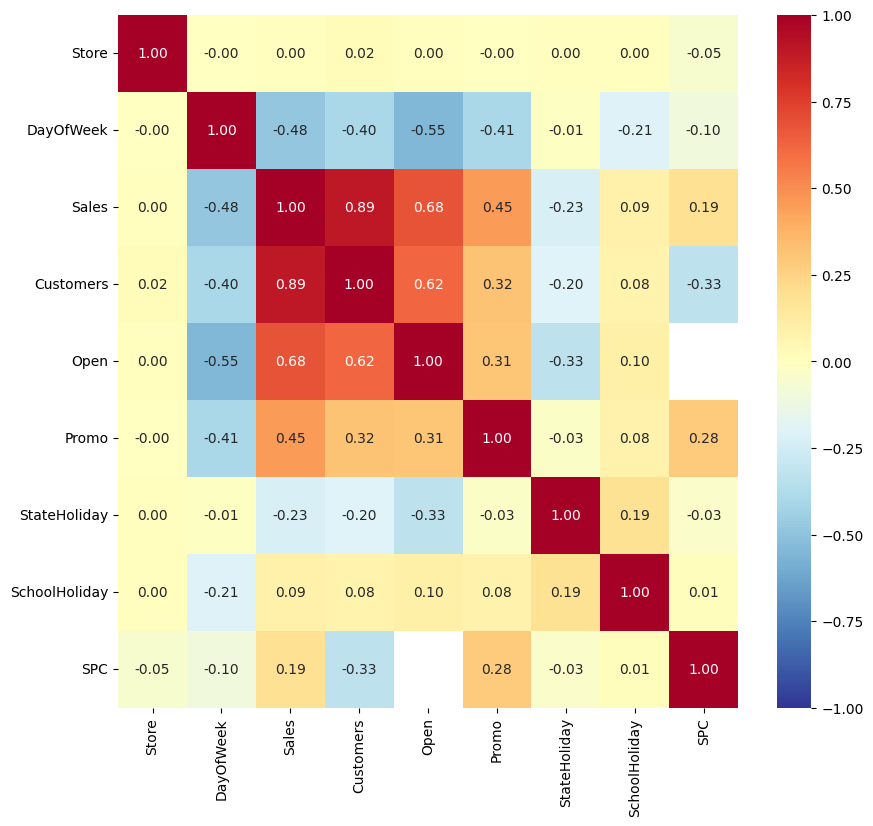

In [20]:
fig, ax = plt.subplots( figsize=(10,9) )
sns.heatmap(corr, 
            
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            fmt='.2f'
              )

In [21]:
df = pd.merge(df,df_store,on='Store')

In [22]:
df['Date']=pd.to_datetime(df['Date'])

In [23]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.week

D:\jpyt\.venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


https://blog.naver.com/PostView.naver?blogId=nilsine11202&logNo=221667433984&redirect=Dlog&widgetTypeCall=true&directAccess=false

In [24]:
df=df[df.Open_x == 1]

In [25]:
df=df.drop(['Open_x','Date'],axis=1)

In [26]:
#데이터 타입 확인
df.dtypes

Store                          int64
DayOfWeek_x                    int64
Sales_x                        int64
Customers_x                    int64
Promo_x                        int64
StateHoliday_x                 int64
SchoolHoliday_x                int64
SPC_x                        float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek_y                  float64
Sales_y                      float64
Customers_y                  float64
Open_y                       float64
Promo_y                      float64
StateHoliday_y               float64
SchoolHoliday_y              float64
SPC_y                        float64
Year                           int64
Month                          int64
D

In [27]:
#숫자형이 아닌 열의 유니크 값 확인 
df[
    'PromoInterval'
].value_counts()

0                   162753
Jan,Apr,Jul,Oct      85805
Feb,May,Aug,Nov      36571
Mar,Jun,Sept,Dec     30423
Name: PromoInterval, dtype: int64

In [28]:
df['StoreType']
df['StoreType']=df['StoreType'].replace('a',0)
df['StoreType']=df['StoreType'].replace('b',1)
df['StoreType']=df['StoreType'].replace('c',2)
df['StoreType']=df['StoreType'].replace('d',3)

In [29]:
df['Assortment']
df['Assortment']=df['Assortment'].replace('a',0)
df['Assortment']=df['Assortment'].replace('b',1)
df['Assortment']=df['Assortment'].replace('c',2)


In [30]:
df=df.drop('PromoInterval',axis=1)

In [31]:
df=df.dropna(axis=0)
print(df.isnull().sum())

Store                        0
DayOfWeek_x                  0
Sales_x                      0
Customers_x                  0
Promo_x                      0
StateHoliday_x               0
SchoolHoliday_x              0
SPC_x                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
DayOfWeek_y                  0
Sales_y                      0
Customers_y                  0
Open_y                       0
Promo_y                      0
StateHoliday_y               0
SchoolHoliday_y              0
SPC_y                        0
Year                         0
Month                        0
Day                          0
Week                         0
dtype: int64


In [32]:
X=df.drop('Sales_x',axis=1)
y=df['Sales_x']

In [33]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
def get_regression_metrics(model, actual, predicted):
    
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    # reg_metrics 반환
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [35]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None


In [36]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [37]:

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel, RFECV

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.982, R^2 test: 0.983


,Linear Regression
Root Mean Squared Error,411.571600
Mean Absolute Error,251.834033
R^2,0.982699
Explained Variance,0.982699


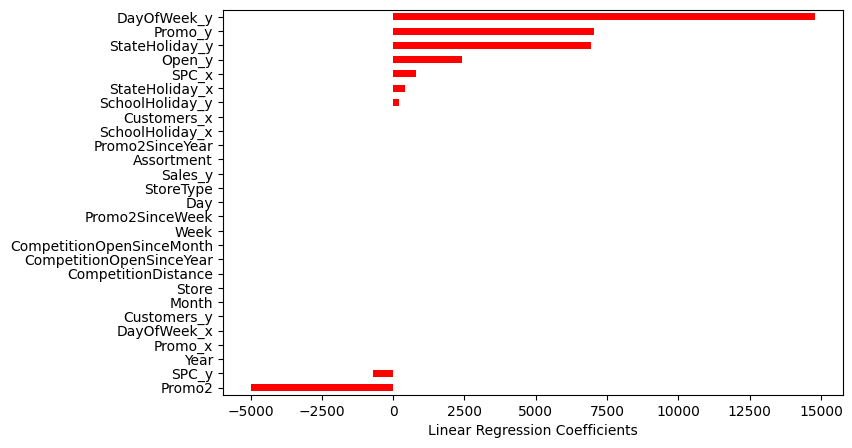

In [38]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

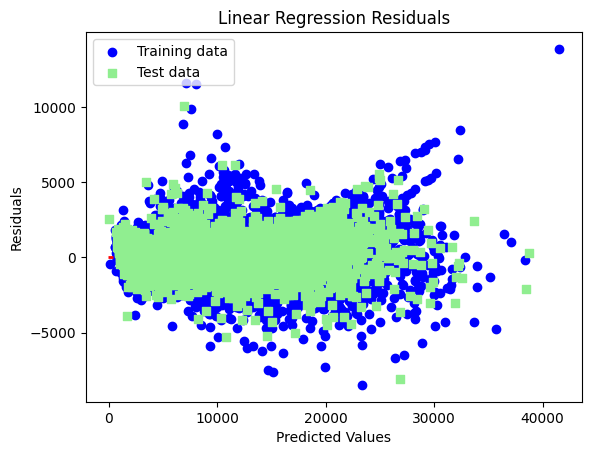

In [39]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

In [40]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.982, R^2 test: 0.983


D:\jpyt\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+10, tolerance: 2.464e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,LASSO
Root Mean Squared Error,411.583126
Mean Absolute Error,251.782745
R^2,0.982698
Explained Variance,0.982698


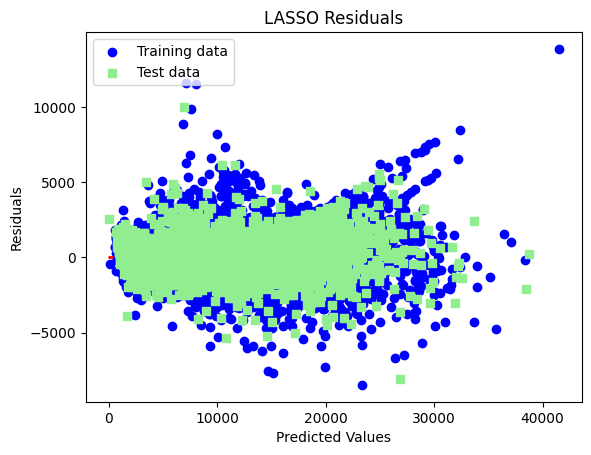

In [41]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

In [42]:
#try ridge

rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.982, R^2 test: 0.983


,Ridge Regression
Root Mean Squared Error,411.569872
Mean Absolute Error,251.809806
R^2,0.982699
Explained Variance,0.982699


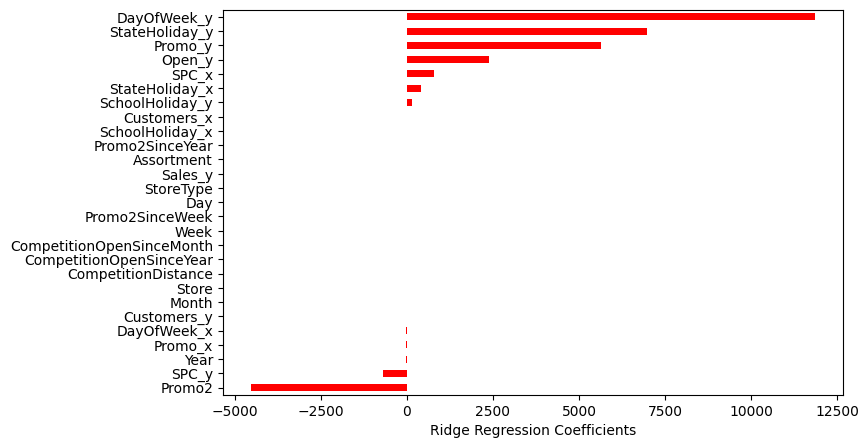

In [43]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

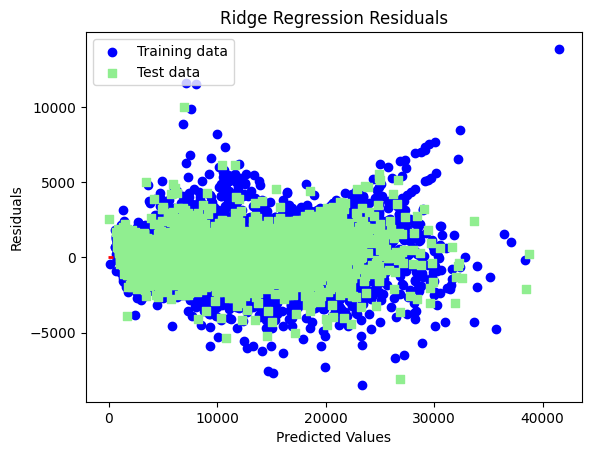

In [44]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

In [45]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 1.000, R^2 test: 1.000


,Polynomial Regression
Root Mean Squared Error,5.663329e-09
Mean Absolute Error,3.902790e-09
R^2,1.000000e+00
Explained Variance,1.000000e+00


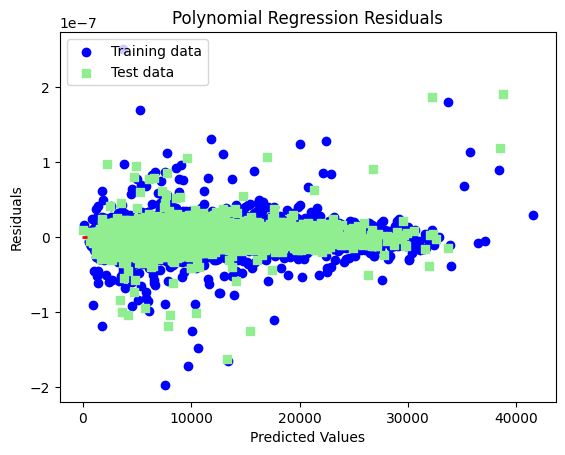

In [46]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

In [47]:
#try Random Forest

rf = RandomForestRegressor(n_estimators=100, max_features=25, max_depth=25, n_jobs=-1, random_state=42) # original features

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 1.000, R^2 test: 1.000


,Random Forest Regression
Root Mean Squared Error,61.857511
Mean Absolute Error,10.544939
R^2,0.999609
Explained Variance,0.999609


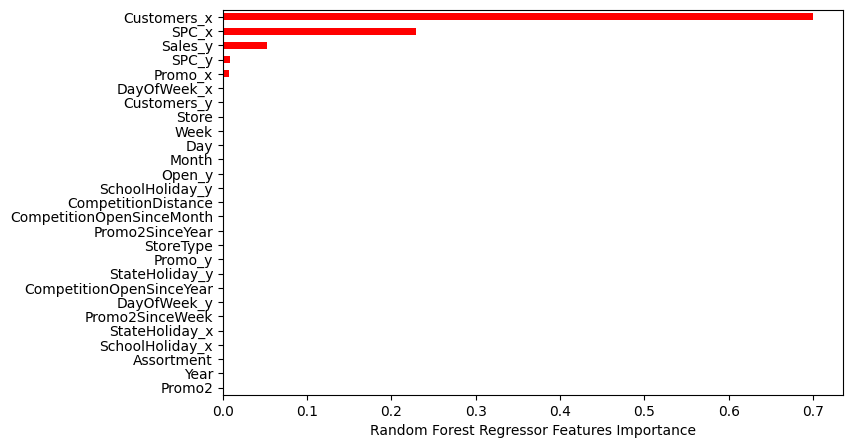

In [48]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )

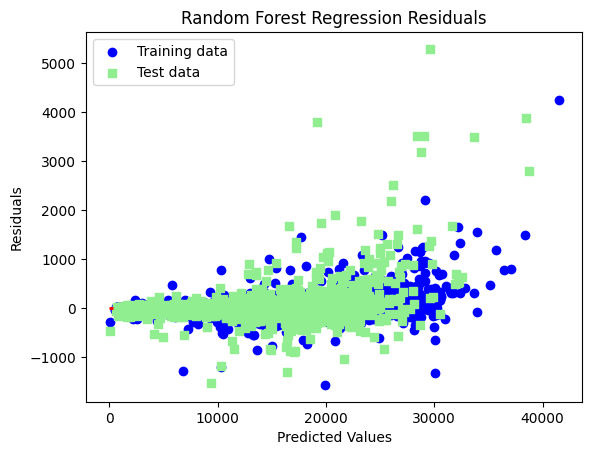

In [49]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

In [50]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Random Forest Regression
Root Mean Squared Error,411.571600,411.583126,411.569872,61.857511
Mean Absolute Error,251.834033,251.782745,251.809806,10.544939
R^2,0.982699,0.982698,0.982699,0.999609
Explained Variance,0.982699,0.982698,0.982699,0.999609
